# Procesamiento de datos con [*pandas*](https://pandas.pydata.org/) 

Pandas es una librería de Python para **leer, manipular y analizar datos** que se combina muy bien con NumPy y Matplotlib

Pandas nos provee de:    

- Dos nuevas estructuras de datos: `DataFrame` y `Series`
- Herramientas de análisis de datos que operan sobre estas estructuras de datos

En esta lección nos enfocaremos en la creación y manipulación de objetos tipo `DataFrame`

Para instalar pandas activa tu ambiente de conda y luego

    conda install pandas
    

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import YouTubeVideo, Markdown, SVG
from functools import partial
YouTubeVideo_formato = partial(YouTubeVideo, modestbranding=1, disablekb=0,
                               width=640, height=360, autoplay=0, rel=0, showinfo=0)

display("Versión de pandas "+pd.__version__)

'Versión de pandas 1.2.1'

## Objeto `pandas.DataFrame`

El objeto [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) es la estructura de datos principal de pandas

- Es un arreglo de dos dimensiones (matriz) que **representa una tabla**
- Las filas y columnas de la tabla se identifican con un índice etiquetado denominado *label*
- Cada columna puede tener tipo distinto 

**Ejemplo:** Considere el siguiente `DataFrame` que representa datos de la bolsa de Santiago:

| |  Monto \[M$\] | Variación \[\%\] |
|---|---|---|
| AGUAS-A 	| 1653 |  0.36 |
| BSANTANDER |	 3531 | -0.31 |
| CMPC 	|  5998 | -0.6 |
| ENTEL |  1408 | 0.0 |

En este ejemplo

- La etiqueta de las filas son los nombres de las empresas
- La etiqueta de las columnas son los nombres de los atributos medidas por la bolsa
- El atributo *Monto* es un entero
- El atributo *Variación* es un flotante

A continuación veremos como crear un manipular objetos `DataFrame`


**Construcción de un `DataFrame`** 

Se usa el constructor

```python
pandas.DataFrame(data=None, 
                 index: Optional[Collection] = None, 
                 columns: Optional[Collection] = None, 
                 dtype: Union[str, numpy.dtype, ExtensionDtype, None] = None, 
                 copy: bool = False)
```

El argumento más importante es `data`, que puede ser un iterable (lista), un diccionario, un ndarray, entre otros

Consideremos lo siguiente

- Si usamos un diccionario los `keys` se interpretan como etiquetas de columnas
- Si usamos un diccionario de diccionarios los `keys` más internos se interpretan como etiquetas de filas
- Si usamos un `ndarray` y no especificamos `index` y/o `columns` se crean etiquetas por defecto

### Ejercicio práctico

Construya un dataframe en base a esta información

In [4]:
clientes = ['Pablo', 'Marianna', 'Matthieu', 'Luis', 'Eliana', 'Cristobal']

ventas = {
    'lechugas [unidades]': [1, 0, 1, 2, 0, 0],
    'papas [kilos]': [0.5, 2, 1.5, 1.2, 0, 5]
}

display(clientes, ventas)

['Pablo', 'Marianna', 'Matthieu', 'Luis', 'Eliana', 'Cristobal']

{'lechugas [unidades]': [1, 0, 1, 2, 0, 0],
 'papas [kilos]': [0.5, 2, 1.5, 1.2, 0, 5]}

Construya un dataframe a partir del `ndarray` aleatorio `data`

In [5]:
data = np.random.randn(5, 5)
display(data)

array([[-0.45599447, -0.14036022, -1.96372627, -0.18214942, -2.1814317 ],
       [-0.16883729, -0.13162936,  0.38030839,  0.68865761,  0.55262555],
       [ 0.7614915 , -1.30887743,  0.31915264, -0.39074673,  0.29496694],
       [ 0.82282815, -1.30846505, -0.00439198,  0.76055221, -0.277607  ],
       [ 0.42474558, -0.80644523,  1.08309693,  0.72679335,  0.58275573]])

**Comentarios y soluciones:**

In [ ]:
YouTubeVideo_formato('5P0wL3dpavI')

## Atributos básicos de un `DataFrame`

Una vez que haz creado un DataFrame es conveniente revisarlo

Si tu DataFrame se llama `df`, puedes usar

- `df.head(5)` y `df.tail(5)` para imprimir las 5 primeras  y 5 últimas filas, respectivamente
- `df.columns` para recuperar un objeto `pandas.Index` con las etiquetas de columna
- `df.index` para recuperar un objeto `pandas.Index` con las etiquetas de fila
- `df.shape` para recuperar una tupla con el número de filas y número de columnas
- `df.dtypes` para recuperar una lista con los tipos asignados a cada columna
- `df.info()` nos da un resumen de lo anterior


### Ejercicio práctico

Considere el dataframe anterior y experimente con estos atributos

In [ ]:
clientes = ['Pablo', 'Marianna', 'Matthieu', 'Luis', 'Eliana', 'Cristobal']

ventas = {
    'lechugas [unidades]': [1, 0, 1, 2, 0, 0],
    'papas [kilos]': [0.5, 2, 1.5, 1.2, 0, 5]
}

df = pd.DataFrame(data=ventas, index=clientes)
display(df)

**Comentarios y solución:**

In [ ]:
YouTubeVideo_formato('BLJzYfY41VA')

## Indexado y *slicing*  de un `DataFrame`

**Indexado en base a etiquetas**

Podemos usar las etiquetas para indexar un DataFrame ya sea en sus filas o en sus columnas

También podemos hacer *slicing*, es decir recuperar un subconjunto de un DataFrame

> Se usa la función `loc[]` para **indexar y hacer slicing en base a la etiqueta**

Notar que se ocupa paréntesis cuadrado


**Ejemplos**

Consideremos el siguiente `DataFrame` guardado en la variable `df`

| |  Monto \[M$\] | Variación \[\%\] |
|---|---|---|
| AGUAS-A 	| 1653 |  0.36 |
| BSANTANDER |	 3531 | -0.31 |
| CMPC 	|  5998 | -0.6 |
| ENTEL |  1408 | 0.0 |

**1** Recuperamos la fila de la empresa Entel con

```python
df.loc["ENTEL"]
```

**2** Recuperamos un slice con las filas de Aguas andina, Banco Santander y CMPC usando el operador `:`

```python
df.loc["AGUAS-A":"CMPC"]
```

En este caso el operador `A:B` indica una secuencia que empieza con A y termina con B

**3** Recuperamos un slice con las filas Entel y Aguas Andina usando `fancy indexing`

```python
df.loc[["ENTEL", "AGUAS-A"]]
```

Recordemos que `fancy indexing` es indexar en base a una lista (o ndarray) que contiene los índices

**4** Recuperamos un slice con las filas anteriores pero sólo con la columna monto total usando

```python
df.loc[["ENTEL", "AGUAS-A"], "Monto [M$]"]
```

Si una etiqueta está mal escrita pandas retornará un `KeyError`. Si un nombre es complicado de escribir o tiene caracteres especiales podemos usar en su lugar `df.columns`, por ejemplo

```python
df.loc[["ENTEL", "AGUAS-A"], df.columns[0]] 
```

es equivalente a 

```python
df.loc[["ENTEL", "AGUAS-A"], "Monto [M$]"]
```

**5** Recuperamos la columna de monto completa de forma eficiente con

```python
df["Monto [M$]"] 
```

Tenga presente la siguiente "ambigüedad" de pandas para no confudirse:

```python
df["Monto [M$]"]  # Esto es equivalente a df.loc[:, "Monto [M$]"]  
df["Monto [M$]":]  # Esto retorna error
df["BSANTANDER"]  # Esto retorna error
df["BSANTANDER":]  # Esto es equivalente a df.loc["BSANTANDER":]
```


**Indexado en base a posición**

Internamente, pandas asigna un número entero a cada fila y cada columna que corresponde a su posición


| |  0 | 1 |
|---|---|---|
| 0	| 1653 |  0.36 |
| 1 |	 3531 | -0.31 |
| 2 	|  5998 | -0.6 |
| 3 |  1408 | 0.0 |

Se puede usar la función `iloc[]` para **indexar y hacer slicing en base a la posición**

Por ejemplo

```python
df.loc["ENTEL"]
```
y
```python
df.iloc[3]
```
son equivalentes. Notar que `iloc[]` soporta todo lo que vimos anteriormente


### Ejercicio práctico

Considerando el `DataFrame` anterior

In [ ]:
clientes = ['Pablo', 'Marianna', 'Matthieu', 'Luis', 'Eliana', 'Cristobal']

ventas = {
    'lechugas [unidades]': [1, 0, 1, 2, 0, 0],
    'papas [kilos]': [0.5, 2, 1.5, 1.2, 0, 5]
}

df = pd.DataFrame(data=ventas, index=clientes)

- Recupere e imprima la fila del cliente Luis
- Recupere e imprima la columna de las papas
- Recupere e imprima el sub dataframe de los clientes Pablo, Marianna y Matthieu
- Recupere e imprima el sub dataframe de los clientes Pablo y Cristobal
- Repita lo anterior pero sólo para la columna lechugas

Compare el resultado de `loc["Matthieu"]` y `iloc[2]` ¿Son equivalentes? ¿Cuál retorna más rápido?

**Comentarios y solución:**

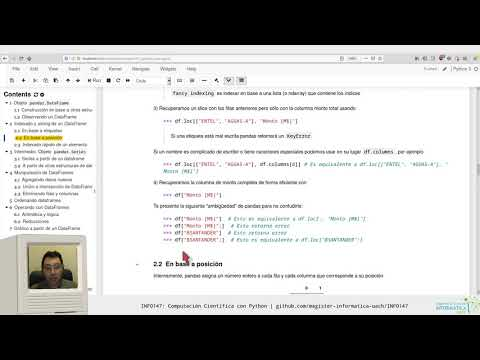

In [6]:
YouTubeVideo_formato('6M3P7ivflsw')

**Indexado rápido de un elemento**

Si queremos recuperar sólo un elemento del DataFrame se recomienda usar las funciones `at[]` e `iat[]`

```python
>>> df.at["ENTEL", "Monto [M$]"]
>>> df.iat[3, 0]
```

Son mucho más rápidas que `loc[]` e `iloc[]` pero no permiten hacer *slicing* ni *fancy indexing*

## Combinación y manipulación de DataFrames

Existen atributos y funciones que nos permiten combinar DataFrames, por ejemplo

- Extender nuestra tabla con filas o columnas nuevas 
- Unir dos tablas
- Intersectar dos tablas
- Eliminar filas y columnas de nuestra tabla

**Agregando filas y columnas**  

Podemos anexar un DataFrame al final de otro usando el atributo `append`

```python
df_nuevo = pd.DataFrame([[100, -30.0]], 
                        index=['JabonCopito'], 
                        columns=['Monto [M]', 'variación [%]'])
df.append(df_nuevo, 
          ignore_index=False, # La combinación usa las etiquetas de df y df_nuevo
          verify_integrity=False # No verifica si existen índices duplicados
         )
```

Notar que `df1.append(df2)` retorna un nuevo DataFrame

También se puede lograr algo similar usando la función `pandas.concat`

```python
pd.concat([df, df_nuevo], 
          axis=0, # Eje de concatenación 0:filas, 1: columnas
          join='inner', # Especifica que se hace con el eje que no se une
          ignore_index: bool = False, # Igual que append
          verify_integrity: bool = False, # Igual que append
```

El argumento principal es una secuencia de DataFrames 

- Podemos juntar más de dos DataFrames
- Podemos juntarlos en filas o en columnas con `axis`
- Podemos especificar que ocurre cuando las filas/columnas no calzan con `join`

```{note}
Por defecto, cuando usamos `append` o `concat` los valores que no se alinean al juntar dos dataframes se llenarán con NaNs
```

Finalmente podemos agregar una columna nueva usando el atributo `insert`

```python
df.insert(loc,  # Ubicación de la nueva columna
          column, # Nombre de la nueva columna
          value,  # Lista o ndarray con valores
          allow_duplicates=False # Impide agregar una columna con una etiqueta existente
         )
                  
```

La operación `insert` es por defecto *inplace* es decir que modifica directamente a `df`

### Ejercicio práctico

- Utilice `append` para  agregar `df2` a `df`
- Utilice `concat` para combinar `df` y `df2`. Pruebe la opción axis 0 y 1
- Utilice `concat` para combinar `df` y `df3`. Pruebe la opción `inner` y `outer`
- Utilice `insert` para agregar a `df` una columna llamada "platanos [kilos]" con valores [2, 1.5, 3, 4, 0, 1.5]


In [ ]:
clientes = ['Pablo', 'Marianna', 'Matthieu', 'Luis', 'Eliana', 'Cristobal']

ventas = {
    'lechugas [unidades]': [1, 0, 1, 2, 0, 0],
    'papas [kilos]': [0.5, 2, 1.5, 1.2, 0, 5]
}

df = pd.DataFrame(data=ventas, index=clientes)
df2 = pd.DataFrame([[3, 0.5]], index=['Hector'], columns=df.columns)
df3 = pd.DataFrame([[0, 2]], index=['Christian'], columns=['lechugas [unidades]', 'platanos [kilos]'])
display(df, df2, df3)

**Comentarios y solución**

In [ ]:
YouTubeVideo_formato('TzEuBC5bwUY')

**Unión e intersección de DataFrames**

Podemos combinar DataFrames de acuerdo a sus contenidos con la función `pandas.merge`

```python
pandas.merge(left, # Primer DataFrame
             right, # Segundo DataFrame
             how: str = 'inner', # Especifica como se uniran los DataFrames
             on=None, # Especifica la columna que se usa para combinar la DataFrames
             ...
            )
```

Algunos detalles

- La columna que se especifica en `on` debe existir en ambos DataFrames
- El argumento `how` tiene las siguientes opciones
    - `left`: Se usan las llaves del primer DataFrame
    - `right`: Se usan las llaves del segundo DataFrame
    - `inner`: Se usa una intersección de las llaves de ambos DataFrames
    - `outer`: Se usa una unión de las llaves de ambos DataFrames


### Ejercicio práctico


Considere los DataFrames `dfa` y `dfb`

- Estudie la diferencia de usar `pd.concat` y `pd.merge`
- Para `merge` compare la opción `on=Alumno` con `on=Curso`
- Para `merge` compare la opción `join=inner`, `join=outer` y `join=left` 

Ahora considera el DataFrame `dfc`

- Fusiónelo con `dfa` y `dfb` comparando las opciones vistas anteriormente

In [ ]:
dfa = pd.DataFrame({'Alumno': ['Jeese', 'James', 'Ash', 'Misty'], 
                    'Curso': ['INFO335', 'INFO147', 'INFO147', 'INFO185'],
                    'NotaP1': np.random.randint(1, 7, 4)})

dfb = pd.DataFrame({'Alumno': ['Ash', 'James', 'Jeese', 'Brock'], 
                    'Curso': ['INFO147', 'INFO147', 'INFO335', 'INFO335'],
                    'NotaP2': np.random.randint(1, 7, 4)})

dfc = pd.DataFrame({'Curso': ['INFO335', 'INFO147', 'INFOXXX'], 
                    'Profesor': ['Cristobal', 'Pablo', 'ProfesorX']})

display(dfa, dfb, dfc)

**Comentarios y solución**

In [ ]:
YouTubeVideo_formato('65JAu1y9pJo')

**Eliminando filas y columnas**

Podemos eliminar filas o columnas de un DataFrame `df` con el atributo `drop`

```python
df.drop(labels=None, # Etiquetas que quiero elimina, un string o una lista
        axis=0, # Eliminar la etiqueta de las filas: 0 o de las columnas: 1
        inplace=False, # No modifica df, en su lugar retorna un DataFrame nuevo
        ...
        )
```

También podemos extraer y eliminar una columna usando el atributo `pop`

**Ordenando DataFrames**

Se puede ordenar un `DataFrame` según los valores de una columna usando el atributo `sort_values`

```python
df.sort_values(by, # Columna que guia el ordenamiento 
               axis=0, # Se ordena según 0: filas o 1:columnas
               ascending=True, # Se ordenan los valores de menor a mayor
               inplace=False, # No se modifica df, se retorna un nuevo DataFrame
```

El argumento `by` recibe una etiqueta o una lista de etiquetas

En el segundo caso se ordenan jerarquicamente

También existe el atributo `sort_index` que permite ordenar filas y columnas según su etiqueta

## Operando con DataFrames 

**Operaciones aritméticas y lógicas**

Podemos hacer operaciones aritméticas simples sobre DataFrames con los atributos 

- `add` y `sub`
- `mul` y `div`
- `pow`
- y sus versiones reversas `radd`, `rdiv`, `rpow` etc

También podemos hacer operaciones lógicas con los atributos

- `eq` y `nq` (igual y no igual)
- `lt`, `gt` (menor que y mayor que)
- `le`, `ge` (menor o igual y mayor o igual

Todos estos atributos tienen argumento `axis` para especificar si la operación es en fila o columna 

Por ejemplo

```python
df.add(10) # Le suma 10 a todos los valores de df
df.add([0, 2]) # Le suma 0 a la primera columna y 2 a la segunda columna de df
df.add(df2) # Suma los valores de df y df2 siguiendo los índices
```

Si usamos una lista tiene que ser tan larga como columnas tenga el `DataFrame`


También podemos extraer un `ndarray` a partir de un `DataFrame` usando el atributo `values`. Esto permite aplicar cualquiera de las funciones de NumPy que vimos en lecciones anteriores

```python
df.values # Returna un ndarray
```

```{note}
Si nuestro DataFrame tiene *strings* entonces `values` no retornará un arreglo de tipo numérico
```

En este caso tenemos dos opciones:

- Podemos usar el atributo [`select_dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html) para obtener un nuevo DataFrame con columnas de tipo numérico
- Podemos  convertir los atributos string a numérico (más adelante detallaremos esto)

En general las operaciones entre columnas se guian por el índice de fila

- Si un índice no es compartido se rellena con un NaN
- También podemos especificar `fill_value`

Si tenemos NaN en filas o columnas podemos

- Eliminarlos con el atributo `dropna(axis='columns', how='any')`
- Rellenarlos con el atributo `fillna(valor)`


**Operaciones de reducciones**

Se pueden aplicar las reducciones que vimos en NumPy directamente sobre las columnas

Algunos atributos para hacer reducción son

- `count()`
- `sum()` y `prod()`
- `mean()` y `std()`
- `max()` e `idxmax()`
- entre otros

También podemos usar el atributo `describe()` que nos entrega varios estadísticos de nuestras columnas

### Ejercicio práctico


Considera el dataFrame `df`

In [ ]:
clientes = ['Pablo', 'Marianna', 'Matthieu', 'Luis', 'Eliana', 'Cristobal']

ventas = {
    'lechugas [unidades]': [1, 0, 1, 2, 0, 0],
    'papas [kilos]': [0.5, 2, 1.5, 1.2, 0, 5]
}

df = pd.DataFrame(data=ventas, index=clientes)

- Digamos que la pesa de la frutería retorna 0.1 Kg de más. Obtenga un nuevo DataFrame que corrija este error
- Encuentre los clientes que compraron más lechugas y más kilos de papas
- Calcule el total de lechugas y kilos de papas vendidos
- Calcule el promedio de lechugas y kilos de papa vendidos

**Comentarios y solución**

In [ ]:
YouTubeVideo_formato('wBQNPVPjNHE')